In [85]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [86]:
data = tf.keras.datasets.cifar10 #Cifar10 data
(x_train,y_train) , (x_test,y_test) = data.load_data() # Split data
x_train.shape

(50000, 32, 32, 3)

In [87]:
class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

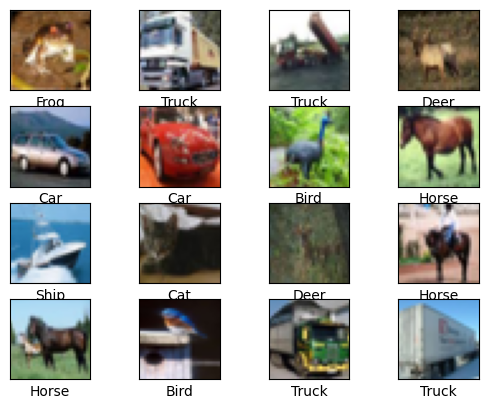

In [88]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])

In [89]:
x_train , x_test = x_train/255 , x_test/255 # normalize data
x_train2,y_train2,x_test2,y_test2 = x_train,y_train,x_test,y_test

In [90]:
x_train = x_train[:20000] # for faster train 
y_train = y_train[:20000]
x_test = x_test[:4000]
y_test = y_test[:4000]

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model = Sequential([
        Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)), 
        MaxPooling2D((2,2)),

        Conv2D(64,(3,3),activation='relu'), # layer with 3x3 64 filters 
        MaxPooling2D((2,2)),

        Conv2D(64,(3,3),activation='relu'),
        Flatten(),
        
        Dense(64,activation='relu'),
        Dense(10,activation='softmax') # 10 output class
])

c:\Users\Furkan-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [94]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2757 - loss: 1.9541 - val_accuracy: 0.4735 - val_loss: 1.4638
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4888 - loss: 1.4058 - val_accuracy: 0.5368 - val_loss: 1.2838
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5582 - loss: 1.2433 - val_accuracy: 0.5665 - val_loss: 1.2055
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6041 - loss: 1.1157 - val_accuracy: 0.6018 - val_loss: 1.1452
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6357 - loss: 1.0395 - val_accuracy: 0.5817 - val_loss: 1.1746
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6633 - loss: 0.9449 - val_accuracy: 0.6135 - val_loss: 1.1219
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7060 - loss: 0.8585 - val_accuracy: 0.6360 - val_loss: 1.0642
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7197 - loss: 0.8070 - val_accuracy: 0.

In [95]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6333 - loss: 1.0717
Loss:1.079962134361267
Accuracy:0.6382499933242798


In [96]:
model2  = Sequential([
        Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)), 
        MaxPooling2D((2,2)),

        Conv2D(64,(3,3),activation='relu'), # layer with 3x3 64 filters 
        MaxPooling2D((2,2)),

        Conv2D(64,(3,3),activation='relu'),
        Flatten(),
        
        Dense(64,activation='relu'),
        Dense(10,activation='softmax') # 10 output class
])

In [97]:
print(x_train2.shape)
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

(50000, 32, 32, 3)


In [98]:
model2.fit(x_train2,y_train2,epochs=10,validation_data=(x_test2,y_test2))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3714 - loss: 1.7203 - val_accuracy: 0.5673 - val_loss: 1.2045
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5775 - loss: 1.1847 - val_accuracy: 0.6250 - val_loss: 1.0573
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6480 - loss: 0.9952 - val_accuracy: 0.6661 - val_loss: 0.9568
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6930 - loss: 0.8840 - val_accuracy: 0.6906 - val_loss: 0.8902
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7164 - loss: 0.8068 - val_accuracy: 0.6988 - val_loss: 0.8721
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7393 - loss: 0.7432 - val_accuracy: 0.7013 - val_loss: 0.8802
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7581 - loss: 0.6890 - val_accuracy: 0.7060 - val_loss: 0.8733
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7704 - loss: 0

In [99]:
loss,accuracy = model2.evaluate(x_test2,y_test2)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7104 - loss: 0.8953
Loss:0.8958612084388733
Accuracy:0.7073000073432922


In [100]:
model3  = Sequential([
        Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)), 
        MaxPooling2D((2,2)),

        Conv2D(64,(3,3),activation='relu'), # layer with 3x3 64 filters 
        MaxPooling2D((2,2)),

        Conv2D(64,(3,3),activation='relu'),
        Flatten(),
        
        Dense(64,activation='relu'),
        Dense(10,activation='softmax') # 10 output class
])

In [101]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [110]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
print(x_train2.shape)

(50000, 32, 32, 3)


In [108]:

model3.fit(x_train2,y_train2,epochs=20,validation_data=(x_test2,y_test2),callbacks=[early_stopping])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3453 - loss: 1.7519 - val_accuracy: 0.5122 - val_loss: 1.3392
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5694 - loss: 1.2177 - val_accuracy: 0.6108 - val_loss: 1.0986
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6339 - loss: 1.0357 - val_accuracy: 0.6399 - val_loss: 1.0215
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6796 - loss: 0.9147 - val_accuracy: 0.6686 - val_loss: 0.9441
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7023 - loss: 0.8498 - val_accuracy: 0.6790 - val_loss: 0.9127
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7279 - loss: 0.7776 - val_accuracy: 0.6908 - val_loss: 0.8987
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7451 - loss: 0.7233 - val_accuracy: 0.6784 - val_loss: 0.9301
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7646 - loss: 0

In [109]:
loss,accuracy = model3.evaluate(x_test2,y_test2)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7097 - loss: 0.8645
Loss:0.8662794232368469
Accuracy:0.7087000012397766


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Deer


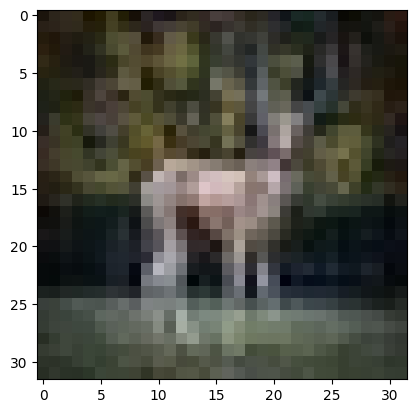

In [ ]:
import cv2 as cv
import numpy as np
image = cv.imread('deer.jpg')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB) # convert to RGB

plt.imshow(image,cmap=plt.cm.binary)

prediction = model3.predict(np.array([image]) / 255) # normalize input and predict
index = np.argmax(prediction) # choose most probability in 10 output
print("Prediction:",class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Truck


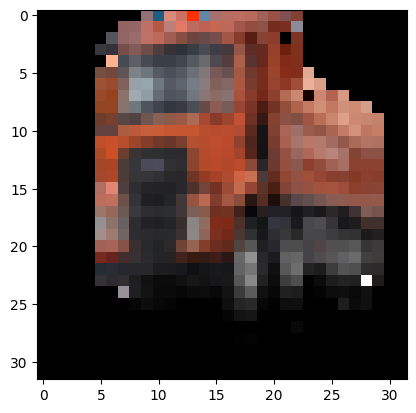

In [116]:
image = cv.imread('truck.png')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

plt.imshow(image,cmap=plt.cm.binary)

prediction = model3.predict(np.array([image]) / 255)
index = np.argmax(prediction)
print("Prediction:",class_names[index])